In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Abatement

In [2]:
def abatement(P, P0, P_50, r, s, P_100):
    if P0 >= P_50:
        print("P0 is greater than P_50")
    elif ((P_100 - P0) / (P_50 - P0)) ** (s / r) <= 2:
        print("MAC curve condition not satisfied")

    P_h = P0 + ((P_50 - P0) ** (-s / r) - 2 * (P_100 - P0) ** (-s / r)) ** (-r / s)

    Am = 1 + ((P_100 - P0) / (P_h - P0)) ** (-s / r)
    A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))
    return A

In [3]:
P0 = 0
P_50 = 100
P_100 = 300

In [4]:
MACC_SCC = np.arange(P0, 10000)

In [5]:
r = 0.03
s_r_array = np.linspace(1, 3, 5)
s_array = r*s_r_array

In [6]:
# for i in range(len(s_array)):
#     abatement_SCC = abatement(P=MACC_SCC, P0=P0, s=s_array[i], P_100=P_100, P_50=P_50, r=r)*100
#     plt.plot(abatement_SCC, MACC_SCC)
#     plt.yscale("log")
#     plt.xlim(0, 120)
#     plt.ylim(0, 1000)

In [7]:
P0_array = np.linspace(0, 50, 6)

In [8]:
P0_array

array([ 0., 10., 20., 30., 40., 50.])

/var/folders/m4/mbpwp5q15070t8lqj4fj7mjr0000gn/T/ipykernel_42202/3337857297.py:10: RuntimeWarning: divide by zero encountered in reciprocal
  A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))
/var/folders/m4/mbpwp5q15070t8lqj4fj7mjr0000gn/T/ipykernel_42202/3337857297.py:10: RuntimeWarning: divide by zero encountered in power
  A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))
/var/folders/m4/mbpwp5q15070t8lqj4fj7mjr0000gn/T/ipykernel_42202/3337857297.py:10: RuntimeWarning: divide by zero encountered in reciprocal
  A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))
/var/folders/m4/mbpwp5q15070t8lqj4fj7mjr0000gn/T/ipykernel_42202/3337857297.py:10: RuntimeWarning: divide by zero encountered in power
  A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))
/var/folders/m4/mbpwp5q15070t8lqj4fj7mjr0000gn/T/ipykernel_42202/3337857297.py:10: RuntimeWarning: divide by zero encountered in reciprocal
  A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))
/var/folders/m4/mbpwp5q15070t8lqj4fj7mjr0000g

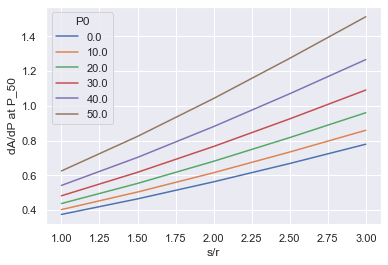

In [9]:
for j in range(len(P0_array)):
    P0=P0_array[j]
    grad_list = []

    for i in range(len(s_array)):
        MACC_SCC = np.arange(P0, 10000)
        x = abatement(P=MACC_SCC, P0=P0, s=s_array[i], P_100=P_100, P_50=P_50, r=r)*100
        grad_x = np.gradient(x)[int(P_50-P0)]
        grad_list.append(grad_x)

    plt.plot(s_r_array, grad_list, label=P0_array[j])

plt.xlabel("s/r")
plt.ylabel("dA/dP at P_50")
plt.legend(title="P0")